

[Tuesday Morning Lecture with save to Google Drive Solution](https://youtu.be/iYoa3A4gRUw)


[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_05/blob/master/MO5_A--Project_Assignment_1.ipynb)


[Dataset Homepage](https://data.ny.gov/Transportation/Traffic-Tickets-Issued-Four-Year-Window/q4hy-kbtf)


14.3 Million Rows by 11 Columns of Traffic Tickets


Project Assignment #1
In this project assignment, we are going to use the "Traffic Tickets Issued: Four Year Window" data set available from the Data.Gov website (https://catalog.data.gov/datasetgroups=local&organization_type=State+Government#topic=local_navigation).

The focus of the analysis will be oriented towards the following attributes within the cities of :

1) Violation Year

2) Violation Month

3) Violation Day of Week

4) Age at Violation

5) Gender

There are a few objectives you need to accomplish:

1) Examine the above-mentioned attributes in the data set for any missing values

2) If there are any missing values, treat the misisng values. Here is a article that provides insight into the common methods to deal with missing values:

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

Please use the tips provided in the article to deal with missing values

3) Compute summary statistics for the "age at violation" for Males and Females respectively

a) Mean, b) Median, c) Standard Deviation, d) Variance

4) Construct a Boxplot to surface the 25%, 50% and 75% percentiles of "Age at Violation" by Gender

5) Construct Histograms to showcase the following:

a) Count of Violations by Day of Week

b) Count of Violations by Month

c) Count of Violations by Gender

6) Hone in on the data set for the Year 2015. Does the 'Violation at Age' and the 'Total # Of Violations' vary together? Construct a scatter plot that plots the 'Violation at Age' v/s the Total # Of Violation'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. Perform this analysis for both the genders.

7) Compute the Correlation Coefficient between the 2 variable i.e. 'Violation at Age' and the 'Total # Of Violations'. Perform this analysis for both the genders.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#!wget https://data.ny.gov/api/views/q4hy-kbtf/rows.csv?accessType=DOWNLOAD -O rows.csv  <---- downloaded wrong data :(


### This worked below
#!curl -C - -O https://data.ny.gov/api/views/q4hy-kbtf/rows.csv?accessType=DOWNLOAD
#!mv rows.csv\?accessType\=DOWNLOAD rows.csv


In [100]:
df = pd.read_csv('rows.csv')
np.shape(df)
df

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,5091G,UNLICENSED GT 60DAYS,2015,1,THURSDAY,55.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
1,376,LIGHTING-VARIOUS VIO,2015,1,THURSDAY,24.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
2,1160C,IMPROPER LEFT TURN ON ONE-WAY RDWY,2015,2,MONDAY,62.0,M,NEW YORK,NYC POLICE DEPT,MANHATTAN SOUTH TVB,TVB
3,5091G,UNLICENSED GT 60DAYS,2015,9,THURSDAY,33.0,F,MICHIGAN,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB
4,5091G,UNLICENSED GT 60DAYS,2015,5,SATURDAY,45.0,M,UNKNOWN,NYC POLICE DEPT,BROOKLYN SOUTH TVB,TVB
5,1225D,OPER MV WHILE USING PORTABLE ELEC DEV,2015,8,SATURDAY,42.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
6,1110A,DISOBEYED TRAFFIC DEVICE,2015,3,THURSDAY,21.0,M,NEW YORK,NYC POLICE DEPT,BRONX TVB,TVB
7,1229C3A,NO LAP/SHOULDER HARNESS OR DJ VIO,2015,2,SATURDAY,40.0,M,NEW YORK,NYC POLICE DEPT,QUEENS NORTH TVB,TVB
8,1110A,DISOBEYED TRAFFIC DEVICE,2015,6,MONDAY,53.0,M,NEW JERSEY,NYC POLICE DEPT,MANHATTAN SOUTH TVB,TVB
9,5091,UNLICENSED OPERATOR,2015,1,SATURDAY,22.0,M,UNKNOWN,NYC POLICE DEPT,QUEENS NORTH TVB,TVB


In [138]:
df['State of License'].value_counts()

### Replace 'UNKNOWN' with 'NEW YORK' which is the most common license type
df0 = df.replace('UNKNOWN', 'NEW YORK')

### Check to make sure that 'NEW YORK' and 'UNKNOWN' add up to become the new total for 'NEW YORK'
print(df['State of License'].value_counts()[0]+df['State of License'].value_counts()[1])

12342200


The 12342200 which is adding UNKNOWN and NEW YORK together to form a larger NEWYORK as shown in df0 below

In [140]:
df0['State of License'].value_counts()
# the df0 'NEW YORK' number is now equal to 'NEW YORK' and 'UNKNOWN' totals for df

NEW YORK                        12342200
NEW JERSEY                        492745
PENNSYLVANIA                      266016
CONNECTICUT                       213823
FLORIDA                           133384
MASSACHUSETTS                     106211
MARYLAND                           70730
ONTARIO CANADA                     64682
CALIFORNIA                         45121
VIRGINIA                           44370
NORTH CAROLINA                     40945
QUEBEC CANADA                      38800
WASHINGTON                         37964
OHIO                               37370
GEORGIA                            35329
VERMONT                            31878
TEXAS                              28839
ILLINOIS                           23836
SOUTH CAROLINA                     19283
MICHIGAN                           17720
NEW HAMPSHIRE                      15874
RHODE ISLAND                       14929
ARIZONA                            11983
DELAWARE                            9957
TENNESSEE       

In [141]:
df0.isnull().sum() # get an idea how man nulls there are in the data set

Violation Charged Code         0
Violation Description          0
Violation Year                 0
Violation Month                0
Violation Day of Week          0
Age at Violation          158181
Gender                         0
State of License              50
Police Agency                  0
Court                          0
Source                         0
dtype: int64

There seem to be a lot of nulls under 'Age at Violation' 
We got rid of 'UNKNOWN' above with 'NEW YORK' let's do the same with the nulls unders 'State of License'

In [142]:
# fill the 'Age of Violation' column na's with the mode of that column
df0['Age at Violation'].fillna(df0['Age at Violation'].mode()[0], inplace=True)

In [143]:
# now test to see if it worked
df0.isnull().sum()

Violation Charged Code     0
Violation Description      0
Violation Year             0
Violation Month            0
Violation Day of Week      0
Age at Violation           0
Gender                     0
State of License          50
Police Agency              0
Court                      0
Source                     0
dtype: int64

We still have 50 nulls in the 'State of License' column, let's get rid of them.

In [144]:
 # this should fill the na's with the most frequent value 'NEW YORK'
df0 = df0.fillna(df['State of License'].value_counts().index[0])

In [145]:
# let's test for nulls again
df0.isnull().sum() 

Violation Charged Code    0
Violation Description     0
Violation Year            0
Violation Month           0
Violation Day of Week     0
Age at Violation          0
Gender                    0
State of License          0
Police Agency             0
Court                     0
Source                    0
dtype: int64

Nulls are gone, let's check for dupes

In [162]:
df0.duplicated().sum()

2214124

In [148]:
df0.shape

(14275009, 11)

In [164]:
df1 = df0 # move to our 3rd version of the data. How decadent!
df1.shape

(14275009, 11)

In [168]:
df1 = df1.drop_duplicates() # this is the way to drop duplicates!
df1.shape

(12060885, 11)

In [166]:
print(14275009-2214124) # The original shape - duplicates so we're on the $

12060885


In [169]:
df1.duplicated().sum() # no duplicates!

0

In [ ]:
!git add . && git status && git commit -am "Got all the nanz and duplicates out of the dataframe!" && git status && git push && git status && time

In [157]:
#          *******          STOPPED HERE     *********
!git add . && git status && git commit -am "Made it to duplication on the assignment" && git status && git push && git status && time

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   .ipynb_checkpoints/T05_S1--NJ--saving_and_retrieving_files_from_GDrive-checkpoint.ipynb
	modified:   M05_A--DJ--Project_Assignment_1.ipynb
	modified:   T05_S1--NJ--saving_and_retrieving_files_from_GDrive.ipynb

[master 855a2a9] Made it to duplication on the assignment
 3 files changed, 876 insertions(+), 369 deletions(-)
 create mode 100644 .ipynb_checkpoints/T05_S1--NJ--saving_and_retrieving_files_from_GDrive-checkpoint.ipynb
 rewrite T05_S1--NJ--saving_and_retrieving_files_from_GDrive.ipynb (99%)
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 3.52 KiB | 900.00 KiB/s, done.
Total 5 (delta 3), r

In [153]:
dfZ[dfZ.duplicated(keep=False)]

,0
0,a
1,b
4,a
5,b


In [12]:
df['Violation Year'].isnull().sum()


0

In [13]:
df['Violation Year'].value_counts()

2014    3594156
2013    3591283
2016    3580991
2015    3508579
Name: Violation Year, dtype: int64

In [14]:
df['Violation Year'].mean()

2014.495921088386

In [15]:
df['Violation Year'].median()

2014.0

In [16]:
df['Violation Year'].mode()

0    2014
dtype: int64

In [51]:
#vydf = np.percentile(df[(df['Violation Year'] == 2014)], [25,50,75])
(df[(df['Violation Year'] == 2013)]['Age at Violation'])

7089570     44.0
7089571     49.0
7089572     28.0
7089573     33.0
7089574     48.0
7089575     30.0
7089576     26.0
7089577     34.0
7089578     24.0
7089579     24.0
7089580     24.0
7089581     24.0
7089582     23.0
7089583     37.0
7089584     53.0
7089585     57.0
7089586     31.0
7089587     55.0
7089588     56.0
7089589     25.0
7089590     46.0
7089591     36.0
7089592     37.0
7089593     18.0
7089594     40.0
7089595     21.0
7089596     21.0
7089597     30.0
7089598     31.0
7089599     21.0
            ... 
10680823    21.0
10680824    21.0
10680825    21.0
10680826    43.0
10680827    43.0
10680828    43.0
10680829    43.0
10680831    39.0
10680832    21.0
10680833    17.0
10680834    21.0
10680835    43.0
10680836    23.0
10680837    23.0
10680838    28.0
10680839    28.0
10680840    28.0
10680841    23.0
10680842    32.0
10680843    32.0
10680844    23.0
10680845    43.0
10680846    21.0
10680847    19.0
10680848    30.0
10680849    30.0
10680850    30.0
10680851    23

In [52]:
data =(df[(df['Violation Year'] == 2013)]['Age at Violation'])

In [60]:
data.value_counts()


23.0    129439
22.0    129125
24.0    124766
25.0    119933
21.0    119595
26.0    113617
27.0    110817
28.0    107182
20.0    106899
29.0    101598
30.0     98970
31.0     95222
32.0     90633
19.0     90557
33.0     87019
34.0     83508
35.0     80998
36.0     77735
42.0     72886
37.0     72752
43.0     71156
38.0     70951
41.0     69115
39.0     68465
44.0     68128
40.0     67684
18.0     65542
45.0     65422
48.0     64945
46.0     63900
         ...  
67.0     11679
68.0      9945
69.0      8954
70.0      8590
16.0      7571
71.0      6721
72.0      5846
73.0      4807
74.0      4035
75.0      3545
76.0      3004
77.0      2462
78.0      2246
79.0      1809
80.0      1587
81.0      1365
82.0      1118
83.0       962
84.0       763
85.0       662
86.0       526
87.0       378
88.0       312
89.0       225
90.0       168
91.0       135
92.0       109
93.0        62
94.0        52
95.0        40
Name: Age at Violation, Length: 80, dtype: int64

In [67]:
print('25 50 75',np.percentile(data.value_counts(), [25,50,75]))
print('mean', data.mean())
print('median',data.median())
print('mode', data.mode())

25 50 75 [ 3409.75 37317.5  71555.  ]
mean 36.70323308511409
median 34.0
mode 0    23.0
dtype: float64


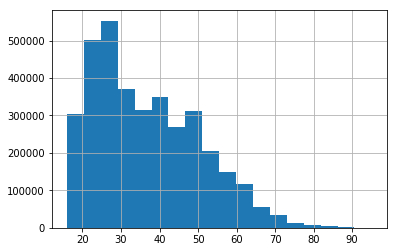

In [77]:
df[(df['Violation Year'] == 2013)]['Age at Violation'].hist(bins=18)

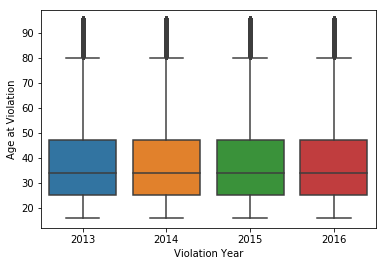

In [82]:
sns.boxplot(x='Violation Year', y='Age at Violation', data=df);

In [96]:
!git status && git add . && git commit -am "testing push to git with saving and checkpointing jupyter notebook" && git status && git push

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .ipynb_checkpoints/M05_A--DJ--Project_Assignment_1-checkpoint.ipynb
	modified:   M05_A--DJ--Project_Assignment_1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[master ecfc935] testing push to git with saving and checkpointing jupyter notebook
 2 files changed, 124 insertions(+), 3 deletions(-)
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 7.30 KiB | 3.65 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.

In [98]:
!git pull

remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From github.com:schwaaweb/aimlds1_05
   ecfc935..489f872  master     -> origin/master
Updating ecfc935..489f872
Fast-forward
 T05_CC--DJ--Statistics_Coding_Challenge_2.ipynb | 60 +++++++++++++++++++++++++
 T05_CC--Statistics_Coding_Challenge_2.ipynb     | 60 +++++++++++++++++++++++++
 2 files changed, 120 insertions(+)
 create mode 100644 T05_CC--DJ--Statistics_Coding_Challenge_2.ipynb
 create mode 100644 T05_CC--Statistics_Coding_Challenge_2.ipynb


In [99]:
df

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,5091G,UNLICENSED GT 60DAYS,2015,1,THURSDAY,55.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
1,376,LIGHTING-VARIOUS VIO,2015,1,THURSDAY,24.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
2,1160C,IMPROPER LEFT TURN ON ONE-WAY RDWY,2015,2,MONDAY,62.0,M,NEW YORK,NYC POLICE DEPT,MANHATTAN SOUTH TVB,TVB
3,5091G,UNLICENSED GT 60DAYS,2015,9,THURSDAY,33.0,F,MICHIGAN,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB
4,5091G,UNLICENSED GT 60DAYS,2015,5,SATURDAY,45.0,M,UNKNOWN,NYC POLICE DEPT,BROOKLYN SOUTH TVB,TVB
5,1225D,OPER MV WHILE USING PORTABLE ELEC DEV,2015,8,SATURDAY,42.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
6,1110A,DISOBEYED TRAFFIC DEVICE,2015,3,THURSDAY,21.0,M,NEW YORK,NYC POLICE DEPT,BRONX TVB,TVB
7,1229C3A,NO LAP/SHOULDER HARNESS OR DJ VIO,2015,2,SATURDAY,40.0,M,NEW YORK,NYC POLICE DEPT,QUEENS NORTH TVB,TVB
8,1110A,DISOBEYED TRAFFIC DEVICE,2015,6,MONDAY,53.0,M,NEW JERSEY,NYC POLICE DEPT,MANHATTAN SOUTH TVB,TVB
9,5091,UNLICENSED OPERATOR,2015,1,SATURDAY,22.0,M,UNKNOWN,NYC POLICE DEPT,QUEENS NORTH TVB,TVB


In [ ]:
!git add . && git status && git commit -am "Replaced the state UNKNOWN Data with NEW YORK" && git status && git push && git status && time